<a href="https://colab.research.google.com/github/EloMleko/YouTube-Comments---Sentiment-Analysis/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [2]:
with open('/content/Api.txt', 'r') as file:
  api_key = file.read()
video_id = 'hPi680baunE'
youtube_build = build('youtube', 'v3', developerKey=api_key)

In [3]:
def get_video_comments(youtube, video_id):

  comments_list = []
  next_page_token = None

  while True:
      request = youtube.commentThreads().list(
          part='snippet',
          videoId = video_id,
          order='relevance',
          pageToken = next_page_token,
          maxResults=100)
      response = request.execute()

      for comment in response['items']:
        comments_list_parameters =  {'text': comment['snippet']['topLevelComment']['snippet']['textOriginal'],
                                  'like_count': comment['snippet']['topLevelComment']['snippet']['likeCount'],
                                 'published': comment['snippet']['topLevelComment']['snippet']['publishedAt']
                                }

        comments_list.append(comments_list_parameters)

      if 'nextPageToken' not in response:
        break

      next_page_token = response['nextPageToken']

  return comments_list

In [4]:
comments= get_video_comments(youtube_build, video_id)

### Create dataset

In [5]:
df = pd.DataFrame(comments)

In [6]:
df

,text,like_count,published
0,“Being emotional got the best of him” \nProcee...,274,2023-07-15T01:33:57Z
1,Russian state media is hilarious to watch -- i...,234,2023-07-15T05:50:45Z
2,Well now I’m really liking this Ivan Popov guy...,14,2023-07-15T17:28:49Z
3,Putin: mercenary groups are illegal in Russia ...,90,2023-07-15T07:34:23Z
4,And some blockheaded African leaders were gloa...,25,2023-07-15T11:26:07Z
...,...,...,...
301,Switserland is an old nazi-friendly country … ...,0,2023-07-15T03:41:17Z
302,Switzerland Boooooooo,0,2023-07-15T19:44:37Z
303,ORCS SUK,0,2023-07-15T05:57:18Z
304,Putin = Genius\n☝️☝️❤️❤️❤️\n☝️☝️❤️❤️❤️,1,2023-07-15T03:38:30Z


In [7]:
df = df.sort_values(['like_count'], ascending=False)

In [8]:
df = df.reset_index().rename(columns={'index': 'id'})

Text(0.5, 0, 'Likes')

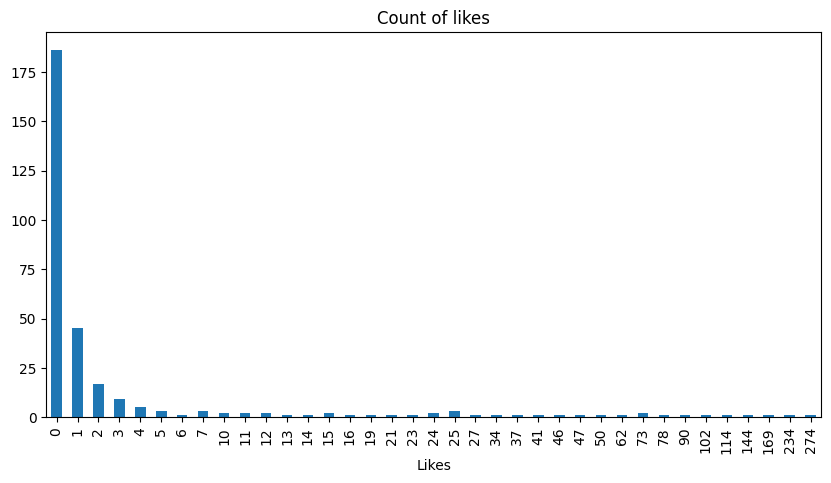

In [9]:
ax = df['like_count'].value_counts().sort_index().plot.bar(title='Count of likes', figsize=(10,5))
ax.set_xlabel('Likes')

In [10]:
example = df['text'][10]

In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

["''", 'When', 'I', 'look', 'into', 'Putin', "'s", '👁', '☠', '👁']

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[("''", "''"),
 ('When', 'WRB'),
 ('I', 'PRP'),
 ('look', 'VBP'),
 ('into', 'IN'),
 ('Putin', 'NNP'),
 ("'s", 'POS'),
 ('👁', 'NNP'),
 ('☠', 'NNP'),
 ('👁', 'NNP')]

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  ''/''
  When/WRB
  I/PRP
  look/VBP
  into/IN
  (PERSON Putin/NNP)
  's/POS
  👁/NNP
  ☠/NNP
  👁/NNP
  eyes/NNS
  I/PRP
  see/VBP
  the/DT
  (ORGANIZATION KGB/NNP)
  ./.
  ''/''
  (ORGANIZATION Republican/JJ)
  Senator/NNP
  (PERSON John/NNP McCain/NNP))


VADER APPROACH

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores('This is awful!')

{'neg': 0.622, 'neu': 0.378, 'pos': 0.0, 'compound': -0.5093}

In [17]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

# Run the polarity score on the enitre dataset

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['text']
  res[i] = sia.polarity_scores(text)


  0%|          | 0/306 [00:00<?, ?it/s]

In [ ]:
#@title
res

In [20]:
vaders = pd.DataFrame(res).T

In [21]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

In [22]:
merged_df = pd.merge(df, vaders, left_on='id', right_on='Id')

In [23]:
merged_df

,id,text,like_count,published,Id,neg,neu,pos,compound
0,0,“Being emotional got the best of him” \nProcee...,274,2023-07-15T01:33:57Z,0,0.340,0.467,0.193,-0.6597
1,1,Russian state media is hilarious to watch -- i...,234,2023-07-15T05:50:45Z,1,0.000,0.876,0.124,0.4019
2,11,"""You are a pathetic nobody"" is better then som...",169,2023-07-15T03:52:51Z,11,0.331,0.554,0.115,-0.6868
3,14,Mercenaries training a professional army. Now ...,144,2023-07-15T00:54:04Z,14,0.000,1.000,0.000,0.0000
4,6,Soloviev and Tucker Carlson. Twins?😂,114,2023-07-15T01:00:46Z,6,0.193,0.695,0.112,-0.3612
...,...,...,...,...,...,...,...,...,...
301,180,🇺🇦🌻☮️🕯️,0,2023-07-15T13:49:45Z,180,0.000,0.125,0.875,0.7906
302,75,"When faced with the prospect of being killed, ...",0,2023-07-15T13:50:32Z,75,0.210,0.584,0.206,-0.0173
303,182,Quite a few aspiring Joseph Goebbels types in ...,0,2023-07-15T15:51:02Z,182,0.085,0.872,0.043,-0.3182
304,183,Pooptin using the word legally is a joke!,0,2023-07-15T13:52:13Z,183,0.000,1.000,0.000,0.0000


Roberta Pretrained Model

In [24]:
!pip install transformers

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [31]:
print(example)

''When I look into Putin's    👁  ☠  👁   eyes  I see the KGB.''

Republican Senator John McCain


In [32]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [34]:
encoded_text = tokenizer(example, return_tensors='pt')

In [35]:
output = model(**encoded_text)

In [37]:
scores = output[0][0].detach().numpy()

In [38]:
scores = softmax(scores)

In [39]:
scores

array([0.3001629 , 0.6570509 , 0.04278612], dtype=float32)

In [41]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.3001629, 'roberta_neu': 0.6570509, 'roberta_pos': 0.04278612}


In [43]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
  return scores_dict

In [47]:
lista = list()
for item in df['text']:
  lista.append(polarity_scores_roberta(item))
